<a href="https://colab.research.google.com/github/Josphat-Malombe/deep_learning/blob/main/model_004.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import torch
import torch.nn as nn

device=torch.device("cuda" if torch.cuda.is_available else "cpu")
device

device(type='cuda')

In [19]:
#data
from sklearn.datasets import make_moons
X,y=make_moons(n_samples=1000, noise=0.1, random_state=42)
X=torch.from_numpy(X).type(torch.float)
y=torch.from_numpy(y).type(torch.float)




In [20]:
#train/test spilt
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2, random_state=42)
#X_train=torch.from_numpy(X_train).type(torch.float).to(device)
len(X_train), len(X_test)

(800, 200)

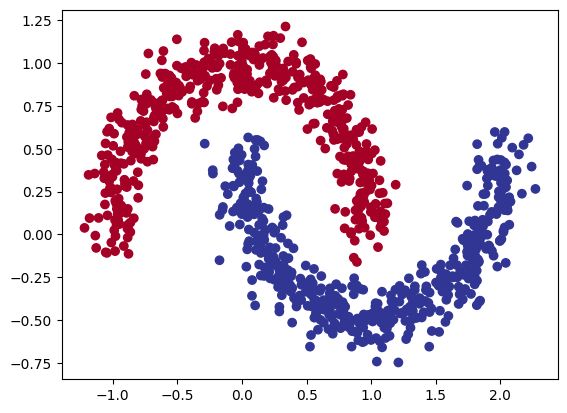

In [21]:
#visualizing the data
import matplotlib.pyplot as plt
plt.scatter(X[:,0], X[:,1], c=y, cmap=plt.cm.RdYlBu)

In [22]:
#model

class MoonModel(nn.Module):
  def __init__(self):
    super().__init__()
    self.layer1=nn.Linear(in_features=2, out_features=32)
    self.layer2=nn.Linear(in_features=32, out_features=128)
    self.layer3=nn.Linear(in_features=128, out_features=1)
    self.sigmoid=nn.Sigmoid()

  def forward(self, x):
    return self.layer3(self.sigmoid(self.layer2(self.sigmoid((self.layer1(x))))))



In [23]:
#optimizers
model_004=MoonModel()
criterion=nn.BCEWithLogitsLoss()
optimizer=torch.optim.SGD(params=model_004.parameters(), lr=0.1)

In [27]:
#accuracy
def Accuracy(y_true,y_pred):
  correct=torch.eq(y_true, y_pred).sum().item()
  acc=(correct/len(y_pred))*100
  return acc

In [40]:
#training+testing
torch.manual_seed=42
epochs=1000

for epoch in range(epochs):
  model_004.train()
  y_logits=model_004(X_train).squeeze()
  y_pred=torch.round(torch.sigmoid(y_logits))
  loss=criterion(y_logits, y_train)
  acc=Accuracy(y_train, y_pred)
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

  model_004.eval()
  with torch.inference_mode():
    test_logits=model_004(X_test).squeeze()
    test_pred=torch.round(torch.sigmoid(test_logits))
    test_loss=criterion(test_logits, y_test)
    test_acc=Accuracy(y_test, test_pred)


  if epoch%100==0:
    print(f"Epoch: {epoch} | Train Loss: {loss} | Accuracy:{acc:.2f}% | Test Loss:{test_loss} | Accuracy: {test_acc:.2f}%")




Epoch: 0 | Train Loss: 0.10050256550312042 | Accuracy:96.25% | Test Loss:0.08693767338991165 | Accuracy: 98.00%
Epoch: 100 | Train Loss: 0.09466474503278732 | Accuracy:96.50% | Test Loss:0.08127274364233017 | Accuracy: 98.50%
Epoch: 200 | Train Loss: 0.08925111591815948 | Accuracy:96.88% | Test Loss:0.07605207711458206 | Accuracy: 98.50%
Epoch: 300 | Train Loss: 0.08424800634384155 | Accuracy:97.25% | Test Loss:0.07125639915466309 | Accuracy: 98.50%
Epoch: 400 | Train Loss: 0.07963523268699646 | Accuracy:97.75% | Test Loss:0.06686083972454071 | Accuracy: 99.00%
Epoch: 500 | Train Loss: 0.07538846880197525 | Accuracy:97.75% | Test Loss:0.0628371611237526 | Accuracy: 99.50%
Epoch: 600 | Train Loss: 0.07148133218288422 | Accuracy:98.12% | Test Loss:0.05915587767958641 | Accuracy: 99.50%
Epoch: 700 | Train Loss: 0.06788673996925354 | Accuracy:98.38% | Test Loss:0.05578744038939476 | Accuracy: 99.50%
Epoch: 800 | Train Loss: 0.06457822024822235 | Accuracy:98.50% | Test Loss:0.05270353704690

In [44]:
#importing file to assist in visualize
import requests
from pathlib import Path
if Path("helper_function.py").is_file():
  print("File already exists")
else:
  print("Downloading the file")
  request=requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  with open("helper_functions.py", "wb") as f:
    f.write(request.content)
from helper_functions import plot_decision_boundary,plot_predictions


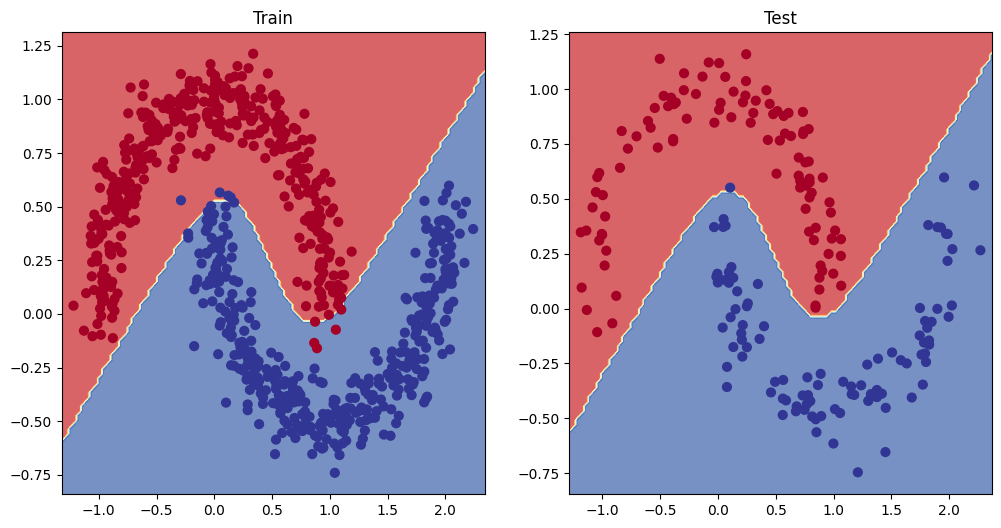

In [45]:
#visualizing
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model_004, X_train,y_train)
plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model_004,X_test,y_test)